In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
from pandas.util._decorators import Appender
import statsmodels.base.model as base
import statsmodels.base.wrapper as wrap
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
import numpy


In [2]:
city=pd.read_csv("GlobalLandTemperaturesByCity.csv", parse_dates=['dt'])
city.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [3]:
country=pd.read_csv("GlobalLandTemperaturesByCountry.csv", parse_dates=['dt'])
country.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [4]:
global_temp=pd.read_csv("GlobalTemperatures.csv", parse_dates=['dt'])
global_temp.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
city.isnull().sum()

dt                                    0
AverageTemperature               364130
AverageTemperatureUncertainty    364130
City                                  0
Country                               0
Latitude                              0
Longitude                             0
dtype: int64

In [6]:
country.isnull().sum()

dt                                   0
AverageTemperature               32651
AverageTemperatureUncertainty    31912
Country                              0
dtype: int64

In [7]:
global_temp.isnull().sum()

dt                                              0
LandAverageTemperature                         12
LandAverageTemperatureUncertainty              12
LandMaxTemperature                           1200
LandMaxTemperatureUncertainty                1200
LandMinTemperature                           1200
LandMinTemperatureUncertainty                1200
LandAndOceanAverageTemperature               1200
LandAndOceanAverageTemperatureUncertainty    1200
dtype: int64

In [8]:
country['year'], country['month'] = country['dt'].dt.year, country['dt'].dt.month
country.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,year,month
0,1743-11-01,4.384,2.294,Åland,1743,11
1,1743-12-01,NaN,NaN,Åland,1743,12
2,1744-01-01,NaN,NaN,Åland,1744,1
3,1744-02-01,NaN,NaN,Åland,1744,2
4,1744-03-01,NaN,NaN,Åland,1744,3


In [9]:
global_temp['year'], global_temp['month'] = global_temp['dt'].dt.year, global_temp['dt'].dt.month
global_temp.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,year,month
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,1750,1
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,1750,2
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN,1750,3
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN,1750,4
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN,1750,5


In [10]:
global_temp_year=global_temp.groupby('year').mean().reset_index()
global_temp_year.head()


,year,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,month
0,1750,8.719364,2.637818,NaN,NaN,NaN,NaN,NaN,NaN,6.5
1,1751,7.976143,2.781143,NaN,NaN,NaN,NaN,NaN,NaN,6.5
2,1752,5.779833,2.977000,NaN,NaN,NaN,NaN,NaN,NaN,6.5
3,1753,8.388083,3.176000,NaN,NaN,NaN,NaN,NaN,NaN,6.5
4,1754,8.469333,3.494250,NaN,NaN,NaN,NaN,NaN,NaN,6.5


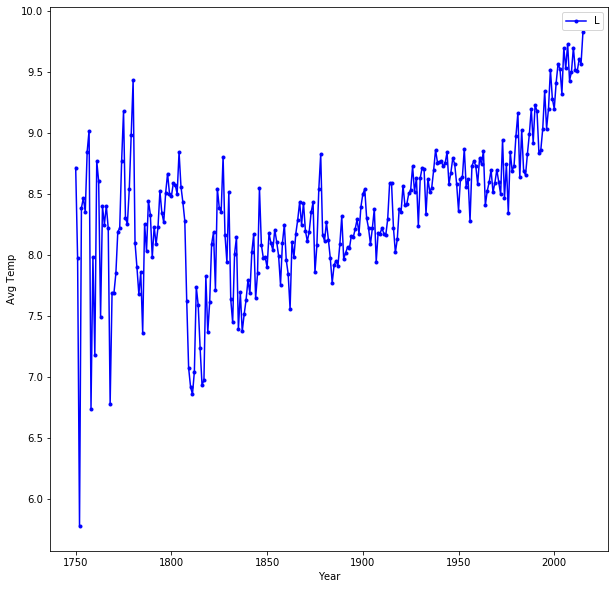

In [11]:
plt.figure (figsize = (10, 10))
plot= plt.plot(global_temp_year.year,global_temp_year.LandAverageTemperature, color='b', marker='.')
plt.xlabel('Year')
plt.ylabel('Avg Temp')
plt.legend('Land')

Text(0, 0.5, 'Year')

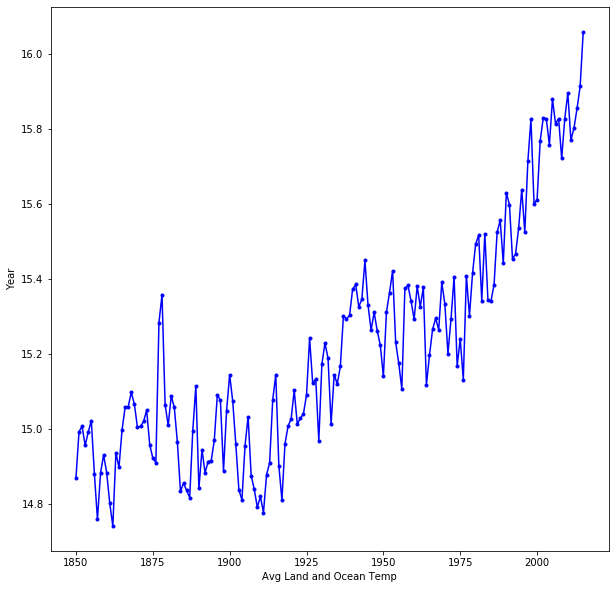

In [12]:
plt.figure (figsize = (10, 10))
plot= plt.plot(global_temp_year.year,global_temp_year.LandAndOceanAverageTemperature, color='b', marker='.')
plt.xlabel('Avg Land and Ocean Temp')
plt.ylabel('Year')


Text(0, 0.5, 'Year')

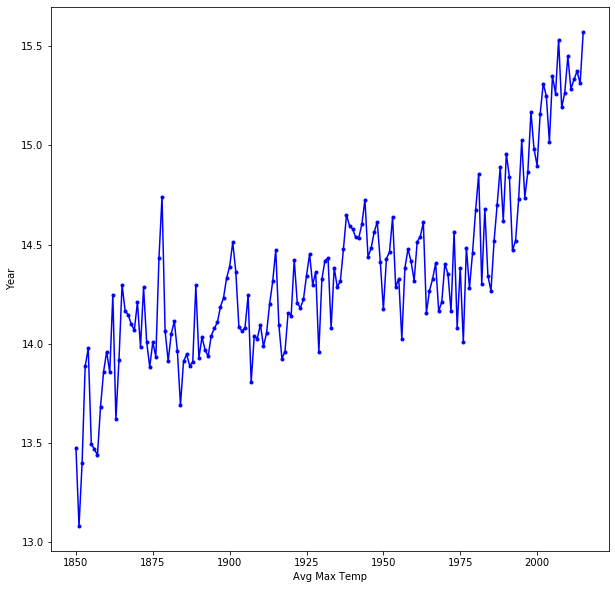

In [13]:
plt.figure (figsize = (10, 10))
plot= plt.plot(global_temp_year.year,global_temp_year.LandMaxTemperature, color='b', marker='.')
plt.xlabel('Avg Max Temp')
plt.ylabel('Year')

In [14]:
country1=country.groupby(['Country'])['AverageTemperature'].mean().reset_index()
country1

,Country,AverageTemperature
0,Afghanistan,14.045007
1,Africa,24.074203
2,Albania,12.610646
3,Algeria,22.985112
4,American Samoa,26.611965
...,...,...
238,Western Sahara,22.319818
239,Yemen,26.253597
240,Zambia,21.282956
241,Zimbabwe,21.117547


In [15]:
#10 hotest sountry
hot=country1.sort_values(by='AverageTemperature',ascending=False)[:10]
hot

,Country,AverageTemperature
60,Djibouti,28.816603
135,Mali,28.441977
34,Burkina Faso,28.083507
192,Senegal,27.967375
12,Aruba,27.920390
229,United Arab Emirates,27.693995
138,Mauritania,27.620256
82,Gambia,27.538552
156,Niger,27.458973
54,Curaçao,27.353415


In [16]:
#10 coldest country
cold= country1.sort_values(by='AverageTemperature', ascending=True)[:10]
cold

,Country,AverageTemperature
88,Greenland,-18.587458
58,Denmark,-18.053051
210,Svalbard And Jan Mayen,-7.448028
180,Russia,-5.521882
39,Canada,-5.216659
144,Mongolia,-0.820671
162,Norway,0.095804
75,Finland,1.244742
204,South Georgia And The South Sandwich Isla,1.401025
102,Iceland,1.405065


In [17]:
hot_and_cold_countries=pd.concat([hot,cold])
hot_and_cold_countries

,Country,AverageTemperature
60,Djibouti,28.816603
135,Mali,28.441977
34,Burkina Faso,28.083507
192,Senegal,27.967375
12,Aruba,27.920390
229,United Arab Emirates,27.693995
138,Mauritania,27.620256
82,Gambia,27.538552
156,Niger,27.458973
54,Curaçao,27.353415


In [18]:
hot_and_cold_countries.sort_values('AverageTemperature',ascending=False)
hot_and_cold_countries

,Country,AverageTemperature
60,Djibouti,28.816603
135,Mali,28.441977
34,Burkina Faso,28.083507
192,Senegal,27.967375
12,Aruba,27.920390
229,United Arab Emirates,27.693995
138,Mauritania,27.620256
82,Gambia,27.538552
156,Niger,27.458973
54,Curaçao,27.353415


[Text(0, 0.5, 'Country'),
 Text(0.5, 0, 'AverageTemperature'),
 Text(0.5, 1.0, 'Hotest and coldest countries')]

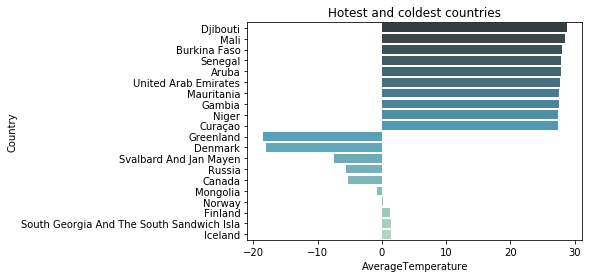

In [19]:

plot= sns.barplot( x= hot_and_cold_countries.AverageTemperature, y= hot_and_cold_countries.Country, palette="GnBu_d")
plot.set(xlabel='AverageTemperature' , ylabel='Country' ,title='Hotest and coldest countries')

In [20]:
country2=country.copy()
country2=country[country2['AverageTemperature']!=0]
country2

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,year,month
0,1743-11-01,4.384,2.294,Åland,1743,11
1,1743-12-01,NaN,NaN,Åland,1743,12
2,1744-01-01,NaN,NaN,Åland,1744,1
3,1744-02-01,NaN,NaN,Åland,1744,2
4,1744-03-01,NaN,NaN,Åland,1744,3
...,...,...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe,2013,5
577458,2013-06-01,17.613,0.473,Zimbabwe,2013,6
577459,2013-07-01,17.000,0.453,Zimbabwe,2013,7
577460,2013-08-01,19.759,0.717,Zimbabwe,2013,8


In [21]:
top=['India','United States','China','Australia','Japan','Germany','United Kingdom']

In [22]:
country2=country2[country2['Country'].isin(top)]

In [23]:
country2=country2.groupby(['Country','year'])['AverageTemperature'].mean().reset_index()
country2

,Country,year,AverageTemperature
0,Australia,1852,20.188500
1,Australia,1853,20.958250
2,Australia,1854,20.284778
3,Australia,1855,20.798636
4,Australia,1856,21.148333
...,...,...,...
1530,United States,2009,9.137083
1531,United States,2010,9.505583
1532,United States,2011,9.549917
1533,United States,2012,10.261083


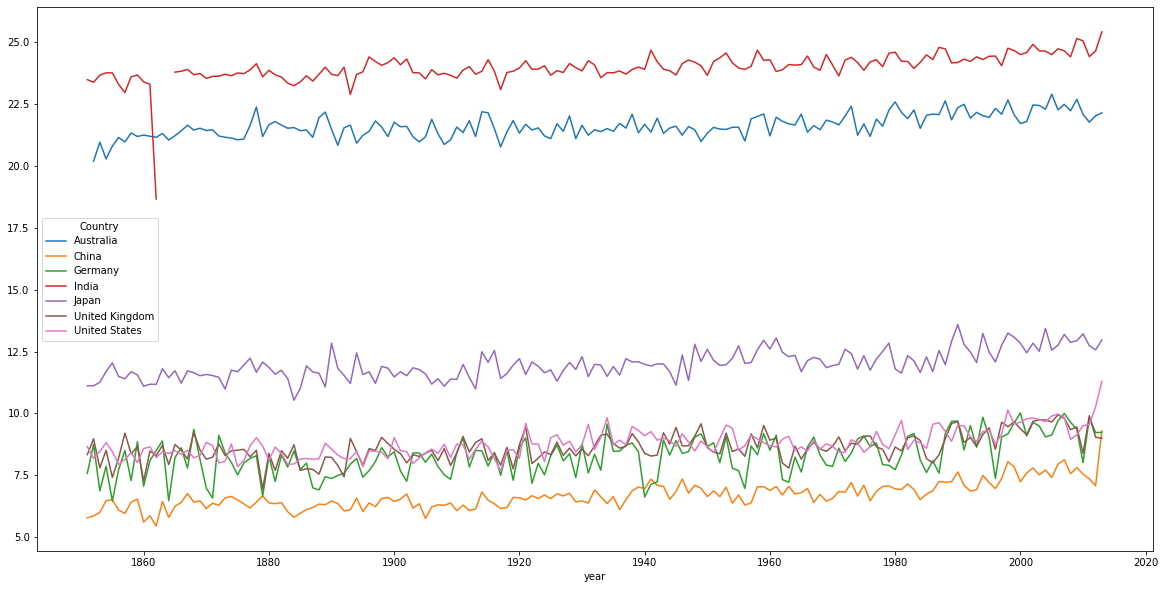

In [24]:
country2=country2[country2['year']>1850]
plot1=country2.pivot('year','Country','AverageTemperature')
f,ax=plt.subplots(figsize=(20,10))
plot1.plot(ax=ax)